In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [5]:
data= pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
print(data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [10]:
print(data.duplicated().sum())

0


#CORR

In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#Graphical representation:

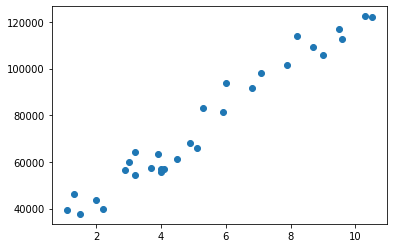

In [13]:
#Graph to check data descripancies
plt.scatter(data['YearsExperience'], data['Salary'])

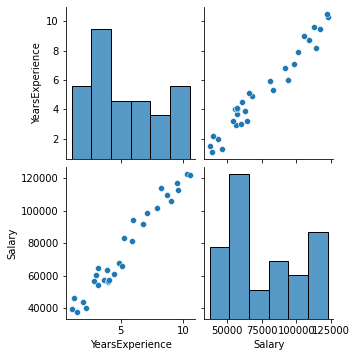

In [14]:
sns.pairplot(data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

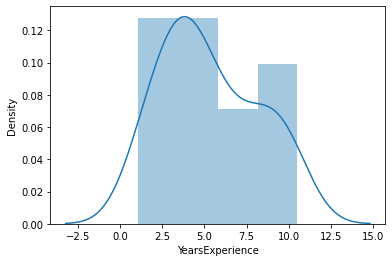

In [15]:
sns.distplot(data['YearsExperience'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

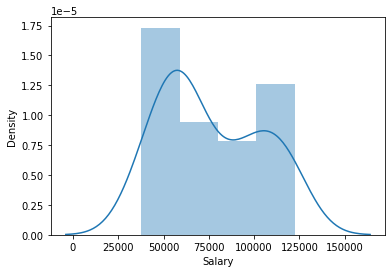

In [16]:
sns.distplot(data['Salary'])

#Regression model graph:

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

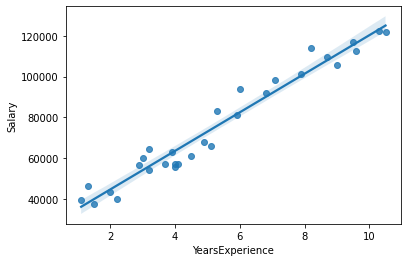

In [18]:
sns.regplot(x='YearsExperience', y='Salary', data=data)

#Model building

In [20]:
model=smf.ols('Salary~YearsExperience', data=data).fit()

#Model accuracy testing

In [21]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
#tvalues and pvalues of the model:
print('The tvalues of the model are:\n{}  \n \nThe pvalues of the model are:\n{}'.format(model.tvalues, model.pvalues))

The tvalues of the model are:
Intercept          11.346940
YearsExperience    24.950094
dtype: float64  
 
The pvalues of the model are:
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [23]:
#R-Squared and Adjusted R-squared value for the model:
print('The Rsquared value of the model is:\n{}  \n \nThe Adjusted rsquared value of the model is:\n{}'.format(model.rsquared, model.rsquared_adj))

The Rsquared value of the model is:
0.9569566641435086  
 
The Adjusted rsquared value of the model is:
0.9554194021486339


#Predication of salary based on years experience:

In [24]:
#lets create a sample dataframe of values 32,35,40,46 to see how our model predicts data
data = pd.Series([32,35,40,46], name='YearsExperience')
sample = pd.DataFrame(data,columns=['YearsExperience'])
sample

,YearsExperience
0,32
1,35
2,40
3,46


In [26]:
#now lets predict the delivery time using our model
predict = round(model.predict(sample))
predict

0    328191.0
1    356541.0
2    403791.0
3    460490.0
dtype: float64